
# Hotel Performance Analysis
Aaron Zheng 
aaronzlcw@gmail.com


#### **Define Problems** 
    
    1.Calculate three Key Performance indicators :Occupancy, ADR, and RevPAR  to evaluate Your Hotel Performanc
    
    2.Finding actionalbe insights to increase performance in 2022.
    
    3.Compare the performance of our comp set with our performance to 
    illustrate the opportunities for our property to gaain market share. 
    
     
#### **Key Performance Indicator**
   
     Occupancy: Number of Rooms Occupied / Number of Rooms Available
     ADR (Average Daily Rate): Revenue / Number of Rooms Occupied
     RevPAR (Revenue Per Available Room): [Occupancy * ADR] or [Revenue / Number of Rooms Available]
     
     MPI: Market Penetration Index  = Hotel Occupancy / Comp Set Occupancy
     ARI: Average Rate Index  = Hotel ADR / Comp Set ADR
     RGI: Revenue Generation Index  = Hotel RevPAR / Comp Set RevPAR

    
#### **Future work**  

     Optimize code more simple effiency, get nice visualization plot.
     Add more Performance Indicator to do Exploratory Data Analysis.  
     Time-series forecasting:
             Decomposition models
             Trend component
             Regression-based models


     


## Packages Import & Load data

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

# define the study file name
fn='/Users/aaronzheng/Desktop/ Case_Study.xlsx'

In [2]:
#load and display the sheet name
df = pd.ExcelFile(fn)
names = df.sheet_names

print('sheet_names = \n') 

n = 0
for x in names:
    print (n,x)
    n+=1


sheet_names = 

0 Context & Instructions
1 Challenge -->
2 Reservation Data - LH
3 Property Information
4 Comp Set Data
5 Comp Set Data 2 - Performance
6 Market Performance


In [3]:
#### Load data 

In [4]:
# Get Reservation Data
data = pd.read_excel (fn, sheet_name = names[2])


# Get Property Information
data2 = pd.read_excel (fn, sheet_name = names[3])
#data2.head(10)


# Get comp set data 
data3 = pd.read_excel (fn, sheet_name = names[4])
data3.head(20)


# Get the data from comp Set performance
data4 = pd.read_excel (fn, sheet_name = names[5])


# Get the market performance data 
data5 = pd.read_excel (fn, sheet_name = names[6], index_col=0).dropna(axis=1)

#data5 = data5.set_index('Unnamed: 0')
print (data5)
 

data.info

            Occupancy         ADR      RevPAR
2017-01-01   0.712923  182.213333  129.876638
2017-02-01   0.814679  194.447257  158.444272
2017-03-01   0.847847  201.338259  170.738413
2017-04-01   0.775665  170.202952  131.866784
2017-05-01   0.704589  150.275735  105.940246
2017-06-01   0.678184  129.797235   87.970883
2017-07-01   0.766990  143.417969  109.978925
2017-08-01   0.718029  124.379433   89.293680
2017-09-01   0.569014  140.948367   80.187933
2017-10-01   0.715352  149.401544  106.841564
2017-11-01   0.777542  164.862745  128.099688
2017-12-01   0.728000  228.690000  166.410000
2018-01-01   0.822000  204.990000  168.450000
2018-02-01   0.888000  230.420000  204.710000
2018-03-01   0.886000  245.230000  217.350000
2018-04-01   0.816000  184.500000  150.460000
2018-05-01   0.737000  163.500000  120.560000
2018-06-01   0.687000  140.830000   96.680000
2018-07-01   0.711000  146.860000  104.370000
2018-08-01   0.685000  140.300000   96.080000
2018-09-01   0.606000  133.760000 

<bound method DataFrame.info of       Reservation Id Date of Booking Consumption Date   Check In  Check Out  \
0                  1      2018-11-02       2018-12-29 2018-12-29 2018-12-30   
1                  2      2018-11-06       2019-01-21 2019-01-21 2019-01-22   
2                  3      2018-11-09       2019-02-15 2019-02-15 2019-02-17   
3                  3      2018-11-09       2019-02-16 2019-02-15 2019-02-17   
4                  4      2018-11-11       2018-12-31 2018-12-31 2019-01-01   
...              ...             ...              ...        ...        ...   
8308            4940      2019-12-31       2020-01-10 2020-01-10 2020-01-12   
8309            4940      2019-12-31       2020-01-11 2020-01-10 2020-01-12   
8310            4941      2019-12-31       2020-02-29 2020-02-27 2020-03-01   
8311            4941      2019-12-31       2020-02-28 2020-02-27 2020-03-01   
8312            4941      2019-12-31       2020-02-27 2020-02-27 2020-03-01   

            Channel

In [5]:
# Get the data from comp Set performance
data4 = pd.read_excel (fn, sheet_name = names[5])

data4.merge)

SyntaxError: unmatched ')' (1683708244.py, line 4)

## Exploratory Data Analysis

#### Check for missing values

In [6]:
#Check for missing values
data.isnull().sum()

Reservation Id      0
Date of Booking     0
Consumption Date    0
Check In            0
Check Out           0
Channel             0
Hotel               0
Revenue             0
Discounts           0
dtype: int64


###  **Insights:** 

     We do not have any missing value to deal with that's great 

#### The channel booking ratio

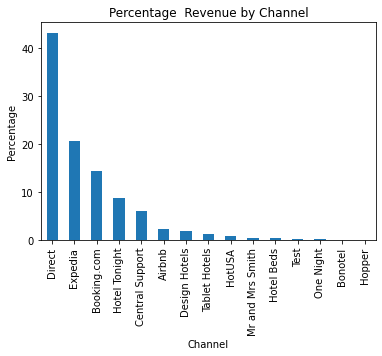

In [7]:
# Total revenue by channel 
channel_sum=data.groupby('Channel')['Revenue'].sum().sort_values(ascending=False) 

channel_per= 100*channel_sum/channel_sum.sum()   # 
channel_per.plot(kind='bar',title='Percentage  Revenue by Channel')
plt.ylabel('Percentage')
plt.show()


In [8]:
channel_sum=data.groupby('Channel')['Revenue'].count()
channel_sum

Channel
Airbnb               183
Bonotel                6
Booking.com         1213
Central Support      486
Design Hotels        166
Direct              3403
Expedia             1635
Hopper                 6
HotUSA                69
Hotel Beds            48
Hotel Tonight        947
Mr and Mrs Smith      37
One Night              8
Tablet Hotels        102
Test                   4
Name: Revenue, dtype: int64

###  **Insights:** 

From the graph above we can easily see that our direct booking channel accounts for more than 40% of revenue compared to third parties

channel. The more direct booking the more revenue we will earn. We will save on third-party commissions to increase our revenue.

We did a really good job of controlling the source of bookings to maximize profitability. 

### Using. agg to select columns to sum 


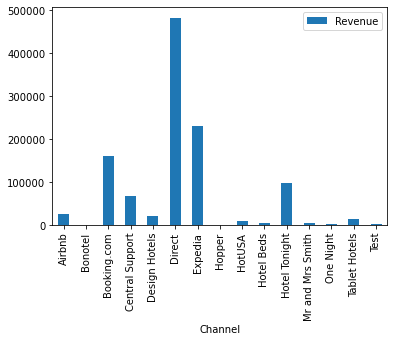

In [9]:
# Total revenue by channel 

channel_sum=data.groupby('Channel').agg({'Revenue':'sum'})



channel_sum.plot(kind='bar')
plt.show()


#channel_per= 100*channel_sum/channel_sum.sum()   # 
#channel_per.plot(kind='bar',title='Percentage  Revenue by Channel')



## Clean Data 

In [10]:

# Get the total number of rooms and beds

data2 = pd.read_excel (fn, sheet_name = names[3])
#print (data2)
num_room = data2.iloc[5,1]
num_bed  = data2.iloc[5,2] # this data is not in the comp set, may not be useful and room number

print('\n num_room:', num_room  ,'num_bed', num_bed )

# Get the total number of rooms and beds For comp Set 

data3 = pd.read_excel (fn, sheet_name = names[4])

comp_room_info = data3.iloc[1:6]
print (comp_room_info)
comp_room_num = comp_room_info['Unnamed: 1'].sum() 
print ('\n comp_room_num  =\n', comp_room_num)


 num_room: 33 num_bed 37
                                     Comp Set Hotels Unnamed: 1
1  Hilton Garden Inn Miami Brickell Near Key Brsc...        129
2                 Holiday Inn Port Of Miami Downtown        200
3             Courtyard Miami Downtown Brickell Area        233
4                                    YVE Hotel Miami        243
5                Hampton Inn Miami Brickell Downtown        221

 comp_room_num  =
 1026


In [11]:
# Extract data in 2019 year 

date = data['Check In'] 

data_start = pd.to_datetime(np.datetime64("2018-03-01"))
data_end   = pd.to_datetime(np.datetime64("2020-01-01"))

print('start =', data_start,'end = ', data_end)

data_crop = data[(date > data_start) & (date < data_end)]
print('Cropped data =\n ', data_crop)
data_analysis = data_crop.sort_values('Reservation Id')
print(data_analysis)
data_analysis.head(20)

start = 2018-03-01 00:00:00 end =  2020-01-01 00:00:00
Cropped data =
        Reservation Id Date of Booking Consumption Date   Check In  Check Out  \
0                  1      2018-11-02       2018-12-29 2018-12-29 2018-12-30   
1                  2      2018-11-06       2019-01-21 2019-01-21 2019-01-22   
2                  3      2018-11-09       2019-02-15 2019-02-15 2019-02-17   
3                  3      2018-11-09       2019-02-16 2019-02-15 2019-02-17   
4                  4      2018-11-11       2018-12-31 2018-12-31 2019-01-01   
...              ...             ...              ...        ...        ...   
8293            4932      2019-12-30       2019-12-31 2019-12-30 2020-01-01   
8294            4932      2019-12-30       2019-12-30 2019-12-30 2020-01-01   
8295            4933      2019-12-30       2019-12-30 2019-12-29 2020-01-01   
8296            4933      2019-12-30       2019-12-29 2019-12-29 2020-01-01   
8297            4933      2019-12-30       2019-12-31 2019-

,Reservation Id,Date of Booking,Consumption Date,Check In,Check Out,Channel,Hotel,Revenue,Discounts
0,1,2018-11-02,2018-12-29,2018-12-29,2018-12-30,Direct,Little Havana,135.590000,0.000
1,2,2018-11-06,2019-01-21,2019-01-21,2019-01-22,Direct,Little Havana,113.850000,0.000
2,3,2018-11-09,2019-02-15,2019-02-15,2019-02-17,Hotel Tonight,Little Havana,92.651850,0.000
3,3,2018-11-09,2019-02-16,2019-02-15,2019-02-17,Hotel Tonight,Little Havana,92.651850,0.000
4,4,2018-11-11,2018-12-31,2018-12-31,2019-01-01,Direct,Little Havana,144.530000,0.000
5,5,2018-11-12,2019-02-08,2019-02-08,2019-02-09,Expedia,Little Havana,130.389565,0.000
9,6,2018-11-14,2019-02-03,2019-01-31,2019-02-04,Expedia,Little Havana,116.808696,0.000
8,6,2018-11-14,2019-01-31,2019-01-31,2019-02-04,Expedia,Little Havana,129.715826,0.000
6,6,2018-11-14,2019-02-01,2019-01-31,2019-02-04,Expedia,Little Havana,137.182609,0.000
7,6,2018-11-14,2019-02-02,2019-01-31,2019-02-04,Expedia,Little Havana,137.182609,0.000


#### Filter the room occupied time

In [12]:

# filter the room occupied time  
n = 0
occupy_raw = []  # 
rid = np.zeros_like(data_analysis['Reservation Id']) # initialize reservation id

# calculate the occupancy per day 

for index, rows in data_analysis.iterrows(): 
    #print(rows, inds,'\n')
    occ = np.arange(rows['Check In'], rows['Check Out'],  timedelta(days=1)).astype(datetime) # timedelta (days=1)
    
    if not (rows['Reservation Id'] in rid):    
        occupy_raw = np.append(occupy_raw, occ, axis = 0)  ### 0 for row
    
        rid[n] = rows['Reservation Id'] # update the 
        n+=1
print(rid)
print(occupy_raw,occupy_raw.shape)


[1 2 3 ... 0 0 0]
[datetime.datetime(2018, 12, 29, 0, 0)
 datetime.datetime(2019, 1, 21, 0, 0) datetime.datetime(2019, 2, 15, 0, 0)
 ... datetime.datetime(2019, 12, 29, 0, 0)
 datetime.datetime(2019, 12, 30, 0, 0)
 datetime.datetime(2019, 12, 31, 0, 0)] (7976,)


#### Occupied & Occupancy over 2019

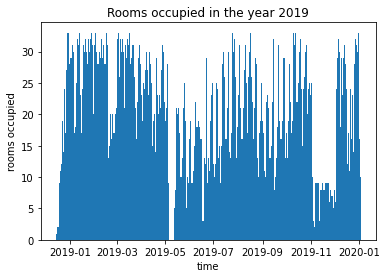

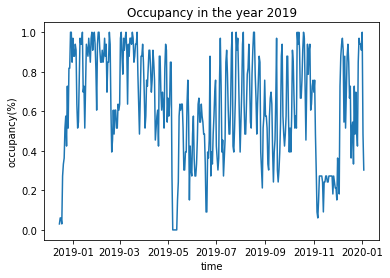

In [13]:
# plot the  rooms occupied & occupancy 
hist_bin = np.arange(occupy_raw.min(), occupy_raw.max(),  timedelta(days=1)).astype(datetime)

#print('time range = ', hist_bin)

hist_occ = plt.hist(occupy_raw,bins =hist_bin)
plt.xlabel('time')
plt.ylabel('rooms occupied')
plt.title('Rooms occupied in the year 2019')
plt.show()

occupy_room = hist_occ[0]
occupancy = hist_occ[0]/num_room
t = hist_bin[1:];

plt.plot(t,occupancy)
plt.xlabel('time')
plt.ylabel('occupancy(%)')
plt.title('Occupancy in the year 2019')
plt.show()

#### Average Daily Rate over 2019

(381,)
0 9989.01585217087
0.0 33.0


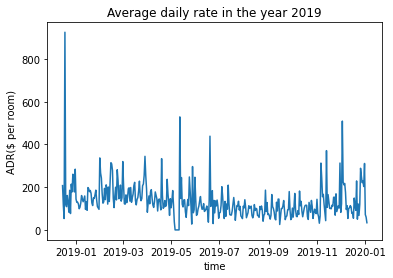

In [14]:
# calculate the revenue per day 

n = 0

time_cal = np.unique(occupy_raw)
print(time_cal.shape)

day_revenue = np.zeros_like(t)

for x in time_cal: 
    day_info = data_analysis[data_analysis['Consumption Date']== x]
    ind = np.where(t == x)
    
    day_revenue[ind] = np.sum(day_info['Revenue'])

print(np.min(day_revenue),np.max(day_revenue))
print(np.min(occupy_room),np.max(occupy_room))

occupy_room[occupy_room==0] = 1 # to avoide divided by zero
ADR = day_revenue/(occupy_room+1e-3)

plt.plot(t,ADR)
plt.xlabel('time')
plt.ylabel('ADR($ per room)')
plt.title('Average daily rate in the year 2019')
plt.show()


#### Revenue Per Available Room

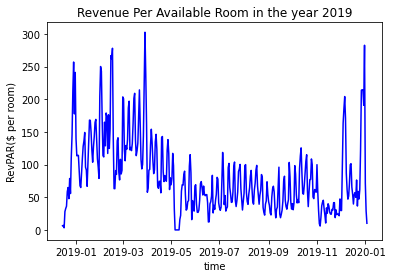

In [15]:
# Revenue Per Available Room
# Check the value from two different methods 


RevPAR1 = day_revenue/num_room

plt.plot(t,RevPAR1,'b')
plt.xlabel('time')
plt.ylabel('RevPAR($ per room)')
plt.title('Revenue Per Available Room in the year 2019')
plt.show()
# these two agree with each other quite well


#### Daily data  

In [16]:

# daily data 

data_daily = pd.DataFrame([t,occupy_room,day_revenue,occupancy,ADR,RevPAR1]).T
data_daily.columns=['Date','Occupied_room','Daily_Revenue','Occupancy','ADR','RevPAR']

data_daily['Room_Aailable']=num_room  
 

data_daily['Room_Aailable']=data_daily['Room_Aailable'].astype(object) # change to object 

print('daily data = \n',data_daily)

data_daily.head(10)

daily data = 
           Date Occupied_room Daily_Revenue Occupancy         ADR      RevPAR  \
0   2018-12-15           1.0      207.5099  0.030303  207.302597    6.288179   
1   2018-12-16           2.0      230.0965  0.060606  114.990755    6.972621   
2   2018-12-17           2.0      106.5302  0.060606   53.238481    3.228188   
3   2018-12-18           1.0    926.119756  0.030303  925.194561   28.064235   
4   2018-12-19           9.0   1082.101968  0.272727  120.220194   32.790969   
..         ...           ...           ...       ...         ...         ...   
380 2019-12-30          31.0   6299.330689  0.939394  203.197661  190.888809   
381 2019-12-31          30.0   9331.362108  0.909091  311.035036  282.768549   
382 2020-01-01          33.0   2366.594283       1.0   71.712805   71.714978   
383 2020-01-02          16.0    957.436049  0.484848   59.836013   29.013214   
384 2020-01-03          10.0    335.652902   0.30303   33.561934     10.1713   

    Room_Aailable  
0   

,Date,Occupied_room,Daily_Revenue,Occupancy,ADR,RevPAR,Room_Aailable
0,2018-12-15,1.0,207.5099,0.030303,207.302597,6.288179,33
1,2018-12-16,2.0,230.0965,0.060606,114.990755,6.972621,33
2,2018-12-17,2.0,106.5302,0.060606,53.238481,3.228188,33
3,2018-12-18,1.0,926.119756,0.030303,925.194561,28.064235,33
4,2018-12-19,9.0,1082.101968,0.272727,120.220194,32.790969,33
5,2018-12-20,11.0,1197.418988,0.333333,108.846376,36.285424,33
6,2018-12-21,12.0,1933.327391,0.363636,161.097191,58.585679,33
7,2018-12-22,17.0,2143.015818,0.515152,126.052339,64.939873,33
8,2018-12-23,19.0,1579.007236,0.575758,83.10127,47.848704,33
9,2018-12-24,14.0,2597.968265,0.424242,185.555908,78.726311,33


#### Montly data 

In [60]:

# convert date to montly data 
data_month=data_daily.Date.dt.to_period("M")


m1=data_daily.groupby(data_month)[["Occupied_room","Daily_Revenue","Room_Aailable"]].sum()


m1.columns=['Monthly_Occupied','Monthly_Revenue','Montly_Room']

m1['ADR']=m1['Monthly_Revenue']/m1['Monthly_Occupied']

m1['Occupancy']= m1['Monthly_Occupied']/m1['Montly_Room'] *100


m1['RevPAR']=m1['Monthly_Revenue']/m1['Montly_Room']
m1.head(5)



,Monthly_Occupied,Monthly_Revenue,Montly_Room,ADR,Occupancy,RevPAR
Date,,,,,,
2018-12,277.0,51618.522077,561,186.348455,49.376114,92.011626
2019-01,865.0,123813.737116,1023,143.137268,84.555230,121.030046
2019-02,704.0,134766.856556,924,191.430194,76.190476,145.851576
2019-03,893.0,161827.302520,1023,181.217584,87.292278,158.188957
2019-04,706.0,97326.939969,990,137.856855,71.313131,98.310040


#### 2019 Monthly Little Havana's KPIs

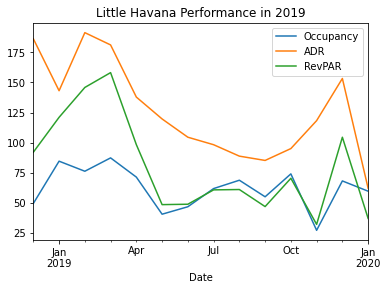

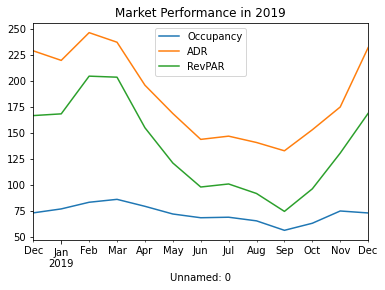

In [61]:
# Little Havana 2019 Performance
m1['Occupancy'].plot()
m1['ADR'].plot()
m1['RevPAR'].plot()
plt.legend(['Occupancy','ADR','RevPAR'])
plt.title('Little Havana Performance in 2019')
plt.show()


# Get the market performance data 
data6 = pd.read_excel (fn, sheet_name = names[6]).dropna(axis=1)

data7=data6.loc[data6['Unnamed: 0'].between('2018-12-01','2020-01-01')]

data7= data7.set_index( 'Unnamed: 0')

## data5.set_index('Unnamed: 0')
data7['Occupancy']=data7['Occupancy']*100

data7['Occupancy'].plot()
data7['ADR'].plot()
data7['RevPAR'].plot()

plt.legend(['Occupancy','ADR','RevPAR'])
plt.title('Market Performance in 2019')

plt.show()




## Actionable Insights


First, look at our hotel plot,  ADR hit a high point and peaked in Feb, then went down. ADR, Occupancy and RevPAR all had a sharp drop from March to April. Then gradual decrease until Sep. Then has marked increase from Sep to Nov.

After that, it sharply drops. We need to know why that Key performance indicator has a sharp drop from March? If we compare with marketing performance 2019, we can see, there has been a sharp drop from March as well, we had a similar trend as 
marketing performance. The interesting point we need to look at is, Our Occupancy dropped from Oct to Nov, but our ADR increased, The strategy we made by increasing room prices to increase our revenue that was successful. 


To increase performance in 2022, during this period time, the only thing we need to do is  boosting our sales, increase the occupancy. Implement different pricing Strategies.


1. We can charge less to encourage people to book in this certain time.

2. We can have Dynamic pricing like changing the room rates regularly based on market demand

3. Offer a better price than our competitor.

4. We can run loyalty programs, We can send personal emails by offering them special discounts, offers, reward points.

5. Run discount offers and promotions like book 2 nights get 1 night free, sell together in one package, offer free services, like free spa, free city tour. 

6. We can have Open pricing, like creating different prices for reservations made by different people segments at different periods by different channels.


## Analysis



####  In this step, we want to find out:

####  **Key Performance Indicators**
   
     Occupancy: Number of Rooms Occupied / Number of Rooms Available
     ADR (Average Daily Rate): Revenue / Number of Rooms Occupied
     RevPAR (Revenue Per Available Room): [Occupancy * ADR] or [Revenue / Number of Rooms Available]
     
     MPI: Market Penetration Index  = Hotel Occupancy / Comp Set Occupancy
     ARI: Average Rate Index  = Hotel ADR / Comp Set ADR
     RGI: Revenue Generation Index  = Hotel RevPAR / Comp Set RevPAR

     weekday (Sunday - Thursday)   and weekend (Friday - Saturday)

In [17]:
# Define a new dataframe for rest of analysis

data_daily=data_daily.set_index('Date') # set date as index


# update new data set 
new_data=data_daily.loc['2019-01-01' : '2019-03-31']  # time range 


data_daily = pd.DataFrame([t,occupy_room,day_revenue,occupancy,ADR,RevPAR1]).T
data_daily.columns=['Date','Occupied_room','Daily_Revenue','Occupancy','ADR','RevPAR']

data_daily['Room_Aailable']=num_room  
 
data_daily['Room_Aailable']=data_daily['Room_Aailable'].astype(object) # change to object 

new=new_data.iloc[:,[0,1,5]]

# resample data
df_yw=new.set_index([new.index.year, new.index.quarter, new.index.month, new.index.weekday,new.index])
df_yw.index.names=['year', 'quarter', 'month','weekday','date']
df_yw.sort_index(inplace=True)

#total_df.head(100)


#### Cleaned data 

In [18]:
# Cleaned data sets 

new=new_data.iloc[:,[0,1,5]]

# resample data
df_yw=new.set_index([new.index.year, new.index.quarter, new.index.month, new.index.weekday,new.index])
df_yw.index.names=['year', 'quarter', 'month','weekday','date']
df_yw.sort_index(inplace=True)


#### KPIs : Sunday to Satuarday 

In [19]:
###################### Date of Week (Sun to Sat )##############################

#Calculate KPIs in all the time period 



# year to date KPIs

weeks_df=df_yw.groupby(level='weekday').sum()  # extrat year to date data 

weeks_df['Occupancy']= (weeks_df['Occupied_room']/weeks_df['Room_Aailable']).mul(100) # multiple 100 
weeks_df['ADR']=weeks_df['Daily_Revenue']/weeks_df['Occupied_room']
weeks_df['PevPAR']=weeks_df['Daily_Revenue']/weeks_df['Room_Aailable']
weeks_df

# current month KPIs

cm_df=df_yw.loc[pd.IndexSlice[:,:,3,:,],:]     # extrac current month data 
cm_total=cm_df.groupby(level='weekday').sum()

cm_total['Occupancy']= (cm_total['Occupied_room']/cm_total['Room_Aailable']).mul(100) # multiple 100 
cm_total['ADR']=cm_total['Daily_Revenue']/cm_total['Occupied_room']
cm_total['PevPAR']=cm_total['Daily_Revenue']/cm_total['Room_Aailable']


##### KPIs : Weekdays:Sunday to Tursday 

In [20]:

##################### Weekdays (between Sunday to Thursday )#######################

# year to date KPIs
week_d=df_yw.loc[pd.IndexSlice[:,:,:,[6,0,1,2,3]],:]   # extract, sunday,monday,tuesday,wednesday

week_total=week_d.groupby(level='weekday').sum()

week_day_Occ=( week_total.sum()[0]/week_total.sum()[2] )*100 # object no mul
week_day_ADR=week_total.sum()[1] /week_total.sum()[0]       
week_day_RevPAR= week_total.sum()[1] /week_total.sum()[2]   


# current month KPIs 

cm_week=df_yw.loc[pd.IndexSlice[:,:,3,[6,0,1,2,3]],:]  # extract  current month data 

cm_week_total=cm_week.groupby(level='weekday').sum()
cm_week_total.sum()


cm_week_Occ=( cm_week_total.sum()[0]/cm_week_total.sum()[2] )*100 # object no mul
cm_week_ADR=cm_week_total.sum()[1] /cm_week_total.sum()[0]
cm_week_RevPAR= cm_week_total.sum()[1] /cm_week_total.sum()[2] 


####   KPIs :Weekend: Friday ,Saturday 

In [21]:

##################### Weekend (Friday,Saturday) #######################

# year to date

weekend_d=df_yw.loc[pd.IndexSlice[:,:,:,[4,5]],:]   # df_yw extract, sunday,monday,tuesday,wednesday

weekend_total=weekend_d.groupby(level='weekday').sum()

# KPIs
weekend__Occ=( weekend_total.sum()[0]/weekend_total.sum()[2] )*100 # object no mul
weekend__ADR=weekend_total.sum()[1] /weekend_total.sum()[0]       
weekend__RevPAR= weekend_total.sum()[1] /weekend_total.sum()[2]   

# curent month  

cm_weekend=df_yw.loc[pd.IndexSlice[:,:,3,[6,0,1,2,3]],:] 

cm_weekend_total=cm_weekend.groupby(level='weekday').sum()
cm_weekend_total.sum()

# KPIs
cm_weekend_Occ=( cm_weekend_total.sum()[0]/cm_weekend_total.sum()[2] )*100 # object no mul

cm_weekend_ADR=cm_weekend_total.sum()[1] /cm_weekend_total.sum()[0]

cm_weekend_RevPAR= cm_weekend_total.sum()[1] /cm_weekend_total.sum()[2] 


#### KPIs :Totaly date of week (Sunday-Saturday)

In [22]:

##################### Total weekdays   #######################


# year to date 

total_df= new_data.resample('W').sum()

total_df.sum()

# KPIs
total_y_Occ=( total_df.sum()[0]/total_df.sum()[5] )*100 # object no mul

total_y_ADR=total_df.sum()[1] /total_df.sum()[0]

total_y_RevPAR= total_df.sum()[1] /total_df.sum()[5] 


# current month 

total_cm_df=total_df.iloc[8:13].sum()

#total_cm_Occ= total_cm_df

total_cm_Occ=( total_cm_df[0] / total_cm_df[5])*100 # object no mul

total_cm_ADR=total_cm_df[1] / total_cm_df[0]

total_cm_RevPAR= total_cm_df[1] /total_cm_df[5] 


####running 3 momth:  is same as year to date 
####running 12 months:  can't get it since we don't have enought data 


#### KPIs: Current month 


In [31]:
#### Current month 

# occpancy :Current Month 

My_hot4= {  'Current_Month':['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday',
                             'Saturday', 'Weekday','Weekend','Total'],
             'My_Prop_Occupancy':[cm_total.iloc[6,3],cm_total.iloc[0,3],cm_total.iloc[1,3],cm_total.iloc[2,3],cm_total.iloc[3,3],
                        cm_total.iloc[4,3],cm_total.iloc[5,3],cm_week_Occ, cm_weekend_Occ, total_cm_Occ],
             "Comp_Occupancy":[86.5,84.8,86.6,86.6,92.8,84.9,93.5,87.4,94.2,89.6]
           
           }


Occupancy_set_c=pd.DataFrame(My_hot4, columns=['Current_Month','My_Prop_Occupancy','Comp_Occupancy'] )

Occupancy_set_c['MPI']= (Occupancy_set_c['My_Prop_Occupancy']/Occupancy_set_c['Comp_Occupancy']).mul(100)



# ADR :Current Month 

My_hot5= {  'Current_Month':['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday',
                             'Saturday', 'Weekday','Weekend','Total'],
             'My_Prop_ADR':[cm_total.iloc[6,4],cm_total.iloc[0,4],cm_total.iloc[1,4],cm_total.iloc[2,4],cm_total.iloc[3,4],
                        cm_total.iloc[4,4],cm_total.iloc[5,4],cm_week_ADR, cm_weekend_ADR, total_cm_ADR],
             "Comp_ADR":[204.18,183.65,193.13,193.27,213.56,234.6,234.5,198.14,234.55,210.49]
           
           }


ADR_set_c=pd.DataFrame(My_hot5, columns=['Current_Month','My_Prop_ADR','Comp_ADR'] )

ADR_set_c['ARI']= (ADR_set_c['My_Prop_ADR']/ADR_set_c['Comp_ADR']).mul(100)


# RevPAR: current 

My_hot6= {  'Current_Month':['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday',
                             'Saturday', 'Weekday','Weekend','Total'],
             'My_Prop_RevPAR':[cm_total.iloc[6,5],cm_total.iloc[0,5],cm_total.iloc[1,5],cm_total.iloc[2,5],cm_total.iloc[3,4],
                        cm_total.iloc[4,5],cm_total.iloc[5,5],cm_week_RevPAR, cm_weekend_RevPAR, total_cm_RevPAR],
             "Comp_RevPA":[176.69,155.75,167.17,167.39,198.11,222.65,219.17,173.2,220.91,188.59]
           
           }



RevPAR_set_c=pd.DataFrame(My_hot6, columns=['Current_Month','My_Prop_RevPAR','Comp_RevPA'] )



RevPAR_set_c['RGI']= (RevPAR_set_c['My_Prop_RevPAR']/RevPAR_set_c['Comp_RevPA']).mul(100)




#### KPIs:  Year to Date 

In [32]:
# occpancy :year to date 

My_hot1= {  'Year_to_Date':['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday',
                             'Saturday', 'Weekday','Weekend','Total'],
             'My_Prop_Occupancy':[weeks_df.iloc[6,3],weeks_df.iloc[0,3],weeks_df.iloc[1,3],weeks_df.iloc[2,3],weeks_df.iloc[3,3],
                        weeks_df.iloc[4,3],weeks_df.iloc[5,3],week_day_Occ, weekend__Occ, total_y_Occ],
             "Comp_Occupancy":[81.5,79.3,84.7,87.2,91.5,91.8,91.2,84.9,91.5,86.8]
           
           }


Occupancy_set=pd.DataFrame(My_hot1, columns=['Year_to_Date','My_Prop_Occupancy','Comp_Occupancy'] )

Occupancy_set['MPI']= (Occupancy_set['My_Prop_Occupancy']/Occupancy_set['Comp_Occupancy']).mul(100)

Occupancy_set
#MPI: Market Penetration Index (MPI) = Hotel Occupancy / Comp Set Occupancy


## ADR :year to date 

My_hot2= {  'Year_to_Date':['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday',
                             'Saturday', 'Weekday','Weekend','Total'],
             'My_Prop_ADR':[weeks_df.iloc[6,4],weeks_df.iloc[0,4],weeks_df.iloc[1,4],weeks_df.iloc[2,4],weeks_df.iloc[3,4],
                       weeks_df.iloc[4,4],weeks_df.iloc[5,4],week_day_ADR, weekend__ADR, total_y_ADR],
             "Comp_ADR":[198.61,188.51,199.84,208.38,223.51,233.57,230.68,204.57,232.13,212.96],
         
           }


ADR_set=pd.DataFrame(My_hot2, columns=['Year_to_Date','My_Prop_ADR','Comp_ADR'] )


ADR_set['ARI']= (ADR_set['My_Prop_ADR']/ADR_set['Comp_ADR']).mul(100)


# RevPAR: year to date 

My_hot3= {  'Year_to_Date':['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday',
                             'Saturday', 'Weekday','Weekend','Total'],
             'My_Prop_RevPAR':[weeks_df.iloc[6,5],weeks_df.iloc[0,5],weeks_df.iloc[1,5],weeks_df.iloc[2,5],
                               weeks_df.iloc[3,5],weeks_df.iloc[4,5],weeks_df.iloc[5,5],
                               week_day_RevPAR, weekend__RevPAR, total_y_RevPAR],
             "Comp_RevPA":[161.87,149.5,169.21,181.75,204.42,214.5,210.29,173.72,212.4,184.9]
         
           }


RevPAR_set=pd.DataFrame(My_hot3, columns=['Year_to_Date','My_Prop_RevPAR','Comp_RevPA'] )



RevPAR_set['RGI']= (RevPAR_set['My_Prop_RevPAR']/RevPAR_set['Comp_RevPA']).mul(100)



#### KPIs:Running 3 months 

In [33]:

# occpancy :running 3 months 

My_hot7= {  'Running_3_months':['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday',
                             'Saturday', 'Weekday','Weekend','Total'],
             'My_Prop_Occupancy':[weeks_df.iloc[6,3],weeks_df.iloc[0,3],weeks_df.iloc[1,3],weeks_df.iloc[2,3],weeks_df.iloc[3,3],
                        weeks_df.iloc[4,3],weeks_df.iloc[5,3],week_day_Occ, weekend__Occ, total_y_Occ],
             "Comp_Occupancy":[81.5,79.3,84.7,87.2,91.5,91.8,91.2,84.9,91.5,86.8]
           
           }


Occupancy_set_r3=pd.DataFrame(My_hot7, columns=['Running_3_months','My_Prop_Occupancy','Comp_Occupancy'] )

Occupancy_set_r3['MPI']= (Occupancy_set_r3['My_Prop_Occupancy']/Occupancy_set_r3['Comp_Occupancy']).mul(100)

Occupancy_set_r3
#MPI: Market Penetration Index (MPI) = Hotel Occupancy / Comp Set Occupancy


## ADR :running 3 months  

My_hot8= {  'Running_3_months':['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday',
                             'Saturday', 'Weekday','Weekend','Total'],
             'My_Prop_ADR':[weeks_df.iloc[6,4],weeks_df.iloc[0,4],weeks_df.iloc[1,4],weeks_df.iloc[2,4],weeks_df.iloc[3,4],
                       weeks_df.iloc[4,4],weeks_df.iloc[5,4],week_day_ADR, weekend__ADR, total_y_ADR],
             "Comp_ADR":[198.61,188.51,199.84,208.38,223.51,233.57,230.68,204.57,232.13,212.96],
         
           }


ADR_set_r3=pd.DataFrame(My_hot8, columns=['Running_3_months','My_Prop_ADR','Comp_ADR'] )


ADR_set_r3['ARI']= (ADR_set_r3['My_Prop_ADR']/ADR_set_r3['Comp_ADR']).mul(100)


# RevPAR:running 3 months 

My_hot9= {  'Running_3_months':['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday',
                             'Saturday', 'Weekday','Weekend','Total'],
             'My_Prop_RevPAR':[weeks_df.iloc[6,5],weeks_df.iloc[0,5],weeks_df.iloc[1,5],weeks_df.iloc[2,5],
                               weeks_df.iloc[3,5],weeks_df.iloc[4,5],weeks_df.iloc[5,5],
                               week_day_RevPAR, weekend__RevPAR, total_y_RevPAR],
             "Comp_RevPA":[161.87,149.5,169.21,181.75,204.42,214.5,210.29,173.72,212.4,184.9]
         
           }


RevPAR_set_r3=pd.DataFrame(My_hot9, columns=['Running_3_months','My_Prop_RevPAR','Comp_RevPA'] )


RevPAR_set_r3['RGI']= (RevPAR_set_r3['My_Prop_RevPAR']/RevPAR_set_r3['Comp_RevPA']).mul(100)




## Data visualisation



  


#### Curent month occpancy

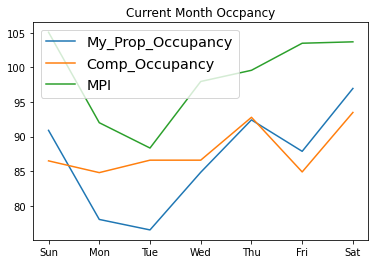

,Current_Month,My_Prop_Occupancy,Comp_Occupancy,MPI
0,Sunday,90.909091,86.5,105.097215
1,Monday,78.030303,84.8,92.016867
2,Tuesday,76.515152,86.6,88.354678
3,Wednesday,84.848485,86.6,97.977465
4,Thursday,92.424242,92.8,99.595089
5,Friday,87.878788,84.9,103.508584
6,Saturday,96.969697,93.5,103.710906
7,Weekday,84.848485,87.4,97.080646
8,Weekend,84.848485,94.2,90.072702
9,Total,83.809524,89.6,93.537415


In [34]:
# curent occpancy
occ_w=Occupancy_set_c.iloc[0:7]

occ_w['My_Prop_Occupancy'].plot()
occ_w['Comp_Occupancy'].plot()
occ_w['MPI'].plot()

#plt.legend(['My_Prop,Comp,MPI'], prop={'size': 6})

plt.title('Current Month Occpancy')



bars = ('Sun', 'Mon', 'Tue', 'Wed', 'Thu','Fri','Sat')
x_pos = np.arange(len(bars))
plt.legend(fontsize="x-large")
plt.xticks(x_pos, bars)

plt.show()

Occupancy_set_c


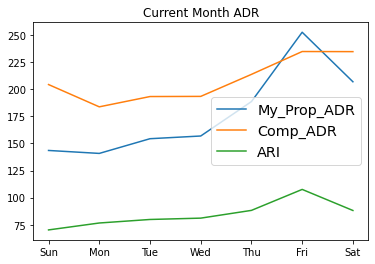

,Current_Month,My_Prop_ADR,Comp_ADR,ARI
0,Sunday,143.468015,204.18,70.265459
1,Monday,140.742366,183.65,76.636192
2,Tuesday,154.288000,193.13,79.888158
3,Wednesday,156.779736,193.27,81.119540
4,Thursday,188.495822,213.56,88.263636
5,Friday,252.365345,234.60,107.572611
6,Saturday,206.742205,234.50,88.162987
7,Weekday,156.727168,198.14,79.099206
8,Weekend,156.727168,234.55,66.820366
9,Total,179.505339,210.49,85.279747


In [35]:
# curent mont ADR 
adr_c=ADR_set_c.iloc[0:7]

adr_c['My_Prop_ADR'].plot()
adr_c['Comp_ADR'].plot()
adr_c['ARI'].plot()

#plt.legend(['My_Prop,Comp,MPI'], prop={'size': 6})

plt.title('Current Month ADR')



bars = ('Sun', 'Mon', 'Tue', 'Wed', 'Thu','Fri','Sat')
x_pos = np.arange(len(bars))
plt.legend(fontsize="x-large")
plt.xticks(x_pos, bars)

plt.show()
ADR_set_c

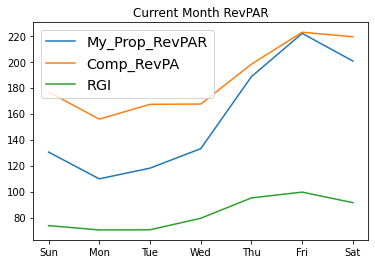

In [36]:
# curent RevPar
rev_w=RevPAR_set_c.iloc[0:7]

rev_w['My_Prop_RevPAR'].plot()
rev_w['Comp_RevPA'].plot()
rev_w['RGI'].plot()


plt.title('Current Month RevPAR')



bars = ('Sun', 'Mon', 'Tue', 'Wed', 'Thu','Fri','Sat')
x_pos = np.arange(len(bars))
plt.legend(fontsize="x-large")
plt.xticks(x_pos, bars)

plt.show()


In [40]:

current_data=adr_c.merge(rev_w,on='Current_Month')\
.merge(occ_w)
current_data.head(50)



## Actionable insights


From above graph shows occupancy,ADR , RevPAR for the current month by each day of the week. On Sunday, Friday, Saturday the MPI ,ARI ,RGI are above 100, which indicates our property is capturing more than its fair share than comp sets. However, on other days, we blow 100, which implies that our hotel underperforms. We need to define what factors o impacts our occupancy.

Because of the comp hotel has better price? Because our hotel is most attracted by people on vacation? We are not attracted by business trip people? We need to define what factors to impacts our occupancy. We need to do more Segmentation analysis in order to make strategy。



##### Year to date 

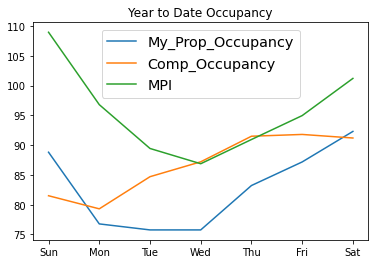

,Year_to_Date,My_Prop_Occupancy,Comp_Occupancy,MPI
0,Sunday,88.811189,81.5,108.970784
1,Monday,76.767677,79.3,96.806654
2,Tuesday,75.757576,84.7,89.442238
3,Wednesday,75.757576,87.2,86.877954
4,Thursday,83.216783,91.5,90.947304
5,Friday,87.179487,91.8,94.966762
6,Saturday,92.307692,91.2,101.214575
7,Weekday,80.113636,84.9,94.362351
8,Weekend,89.743590,91.5,98.080426
9,Total,82.895623,86.8,95.501870


In [41]:
# Year to date Occupancy

oc_y=Occupancy_set.iloc[0:7]

oc_y['My_Prop_Occupancy'].plot()
oc_y['Comp_Occupancy'].plot()
oc_y['MPI'].plot()

#plt.legend(['My_Prop,Comp,MPI'], prop={'size': 6})

plt.title('Year to Date Occupancy')



bars = ('Sun', 'Mon', 'Tue', 'Wed', 'Thu','Fri','Sat')
x_pos = np.arange(len(bars))
plt.legend(fontsize="x-large")
plt.xticks(x_pos, bars)

plt.show()
Occupancy_set

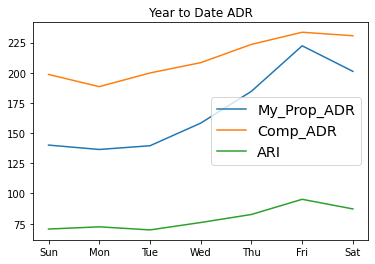

,Year_to_Date,My_Prop_ADR,Comp_ADR,ARI
0,Sunday,140.096305,198.61,70.538394
1,Monday,136.464641,188.51,72.391195
2,Tuesday,139.549121,199.84,69.830425
3,Wednesday,158.299776,208.38,75.966876
4,Thursday,184.670647,223.51,82.622991
5,Friday,222.341587,233.57,95.192699
6,Saturday,201.166381,230.68,87.205818
7,Weekday,152.240104,204.57,74.419565
8,Weekend,211.451481,232.13,91.091837
9,Total,170.758691,212.96,80.183457


In [42]:
# Year to date ADR

adr_y=ADR_set.iloc[0:7]

adr_y['My_Prop_ADR'].plot()
adr_y['Comp_ADR'].plot()
adr_y['ARI'].plot()

#plt.legend(['My_Prop,Comp,MPI'], prop={'size': 6})

plt.title('Year to Date ADR')



bars = ('Sun', 'Mon', 'Tue', 'Wed', 'Thu','Fri','Sat')
x_pos = np.arange(len(bars))
plt.legend(fontsize="x-large")
plt.xticks(x_pos, bars)

plt.show()
ADR_set

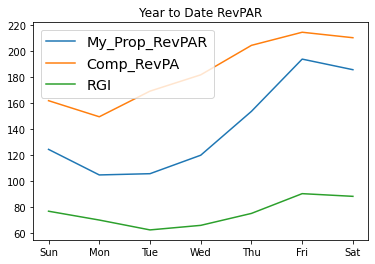

,Year_to_Date,My_Prop_RevPAR,Comp_RevPA,RGI
0,Sunday,124.421194,161.87,76.864888
1,Monday,104.760734,149.50,70.074070
2,Tuesday,105.719031,169.21,62.478004
3,Wednesday,119.924073,181.75,65.982984
4,Thursday,153.676972,204.42,75.177073
5,Friday,193.836255,214.50,90.366553
6,Saturday,185.692044,210.29,88.302841
7,Weekday,121.965083,173.72,70.207854
8,Weekend,189.764150,212.40,89.342820
9,Total,141.551480,184.90,76.555695


In [43]:
# Year to date RevPAR_set

rev_y=RevPAR_set.iloc[0:7]

rev_y['My_Prop_RevPAR'].plot()
rev_y['Comp_RevPA'].plot()
rev_y['RGI'].plot()

#plt.legend(['My_Prop,Comp,MPI'], prop={'size': 6})

plt.title('Year to Date RevPAR')



bars = ('Sun', 'Mon', 'Tue', 'Wed', 'Thu','Fri','Sat')
x_pos = np.arange(len(bars))
plt.legend(fontsize="x-large")
plt.xticks(x_pos, bars)

plt.show()
RevPAR_set

### Merge two table 

In [47]:
# year to date 

New_data=ADR_set.merge(RevPAR_set,on='Year_to_Date')\
.merge(Occupancy_set,on='Year_to_Date')


current_data=adr_c.merge(rev_w,on='Current_Month')\
.merge(occ_w)

current_data.set_index('Current_Month')

New_data.set_index('Year_to_Date')

nn=New_data.merge(current_data,left_on='Year_to_Date',right_on='Current_Month')
nn
nw=New_data.merge(nn,on='Year_to_Date')

,Year_to_Date,My_Prop_ADR,Comp_ADR,ARI,My_Prop_RevPAR,Comp_RevPA,RGI,My_Prop_Occupancy,Comp_Occupancy,MPI
0,Sunday,140.096305,198.61,70.538394,124.421194,161.87,76.864888,88.811189,81.5,108.970784
1,Monday,136.464641,188.51,72.391195,104.760734,149.50,70.074070,76.767677,79.3,96.806654
2,Tuesday,139.549121,199.84,69.830425,105.719031,169.21,62.478004,75.757576,84.7,89.442238
3,Wednesday,158.299776,208.38,75.966876,119.924073,181.75,65.982984,75.757576,87.2,86.877954
4,Thursday,184.670647,223.51,82.622991,153.676972,204.42,75.177073,83.216783,91.5,90.947304
5,Friday,222.341587,233.57,95.192699,193.836255,214.50,90.366553,87.179487,91.8,94.966762
6,Saturday,201.166381,230.68,87.205818,185.692044,210.29,88.302841,92.307692,91.2,101.214575
7,Weekday,152.240104,204.57,74.419565,121.965083,173.72,70.207854,80.113636,84.9,94.362351
8,Weekend,211.451481,232.13,91.091837,189.764150,212.40,89.342820,89.743590,91.5,98.080426
9,Total,170.758691,212.96,80.183457,141.551480,184.90,76.555695,82.895623,86.8,95.501870



## Actionable Insights



From above graph shows occupancy, ADR, RevPAR for the year to date  by each day of the week,weekdays/weekend. All the index MPI ,ARI ,RGI are below 100, which implies that our hotel under performing than comp sets. 

We need to boost our occupancy and optimize the pricing strategy. One thing need to keep mind, We cannot come up a
conclusion that our strategy fail. Here are some reasons, first,our hotel is a brand new hote just lunched not to 
long. It take time to target our customer and get market share.  Second, we need to consider the weather conditions in 2019 years, if weather is a reason let up to capture more customer. Third, the Competitive Set may  not determine appropriate, those competitor's hotel Capacity are way much than our hotel, we only have 33 rooms.


The reason I did not do a forecast is the data we have is limited. Since Covid-19 changed people's lifestyles, too many uncertain facts will cause bias.



,Year_to_Date,My_Prop_ADR,Comp_ADR,ARI,My_Prop_RevPAR,Comp_RevPA,RGI,My_Prop_Occupancy,Comp_Occupancy,MPI,...,Current_Month,My_Prop_ADR_y,Comp_ADR_y,ARI_y,My_Prop_RevPAR_y,Comp_RevPA_y,RGI_y,My_Prop_Occupancy_y,Comp_Occupancy_y,MPI_y
0,Sunday,140.096305,198.61,70.538394,124.421194,161.87,76.864888,88.811189,81.5,108.970784,...,Sunday,143.468015,204.18,70.265459,130.425468,176.69,73.815987,90.909091,86.5,105.097215
1,Monday,136.464641,188.51,72.391195,104.760734,149.50,70.074070,76.767677,79.3,96.806654,...,Monday,140.742366,183.65,76.636192,109.821695,155.75,70.511522,78.030303,84.8,92.016867
2,Tuesday,139.549121,199.84,69.830425,105.719031,169.21,62.478004,75.757576,84.7,89.442238,...,Tuesday,154.288000,193.13,79.888158,118.053697,167.17,70.618949,76.515152,86.6,88.354678
3,Wednesday,158.299776,208.38,75.966876,119.924073,181.75,65.982984,75.757576,87.2,86.877954,...,Wednesday,156.779736,193.27,81.119540,133.025230,167.39,79.470237,84.848485,86.6,97.977465
4,Thursday,184.670647,223.51,82.622991,153.676972,204.42,75.177073,83.216783,91.5,90.947304,...,Thursday,188.495822,213.56,88.263636,188.495822,198.11,95.147051,92.424242,92.8,99.595089
5,Friday,222.341587,233.57,95.192699,193.836255,214.50,90.366553,87.179487,91.8,94.966762,...,Friday,252.365345,234.60,107.572611,221.775606,222.65,99.607279,87.878788,84.9,103.508584
6,Saturday,201.166381,230.68,87.205818,185.692044,210.29,88.302841,92.307692,91.2,101.214575,...,Saturday,206.742205,234.50,88.162987,200.477290,219.17,91.471137,96.969697,93.5,103.710906
